# **Regression problem with ANN**

### Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### Load the data

In [2]:
housing_data = fetch_california_housing()
print(housing_data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [3]:
print(housing_data.DESCR) # Dataset secription
print(housing_data.feature_names) # Predictor column names
print(housing_data.target_names) # Target variable

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
# Split the data into training, validation and testing data

x_train_full, x_test, y_train_full, y_test = train_test_split(housing_data.data, housing_data.target, test_size=0.2, random_state=365)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=365)

In [5]:
# Transform the data

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [6]:
# Set seed
np.random.seed(365)
tf.random.set_seed(365)

In [7]:
print(x_train_scaled.shape, x_valid_scaled.shape, x_test_scaled.shape)

(13209, 8) (3303, 8) (4128, 8)


In [8]:
# Set the model sequential and layers

model = keras.models.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1),
])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='mean_squared_error',
             optimizer=keras.optimizers.Adam(learning_rate=1e-3),
             metrics=['mean_absolute_error'])

In [11]:
# Set early stopping callbacks and save best model

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint('model_cb.keras', save_best_only=True)

In [12]:
# Fit the model

model_history = model.fit(x_train_scaled, y_train, 
                          epochs=100, 
                          validation_data=(x_valid_scaled, y_valid),
                          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 2.0177 - mean_absolute_error: 1.0153 - val_loss: 0.4413 - val_mean_absolute_error: 0.4703
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.4442 - mean_absolute_error: 0.4737 - val_loss: 0.3801 - val_mean_absolute_error: 0.4307
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.3912 - mean_absolute_error: 0.4489 - val_loss: 0.3614 - val_mean_absolute_error: 0.4181
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3740 - mean_absolute_error: 0.4370 - val_loss: 0.3451 - val_mean_absolute_error: 0.4074
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3621 - mean_absolute_error: 0.4283 - val_loss: 0.3347 - val_mean_absolute_error: 0.4002
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.3533 - mean_absolute_error: 0.4213 - val_loss: 0.3252 - val_mean_absolute_error: 0.3931
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.3450 - mean_absolute_error: 0

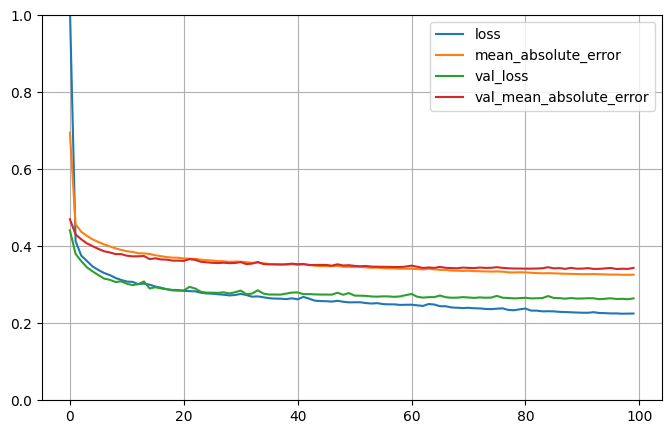

In [13]:
# Plot the actual data and validation data loss and accuracy

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
# Model test accuracy

mae_test = model.evaluate(x_test_scaled, y_test)
mae_test

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2960 - mean_absolute_error: 0.3618


[0.2738259434700012, 0.3486127555370331]

In [15]:
x_new = x_test_scaled[:3]

In [16]:
y_pred = model.predict(x_new)
print(y_pred)
print(y_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
[[1.7871082]
 [1.4155784]
 [2.851282 ]]
[2.263 1.07  2.734]
